In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#!pip install pmdarima

/var/folders/09/t5f173_57wj_mzwtx_28y9y80000gn/T/ipykernel_14046/4172812954.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../Data/perrin-freres-monthly-champagne.csv",


<Axes: xlabel='Month'>

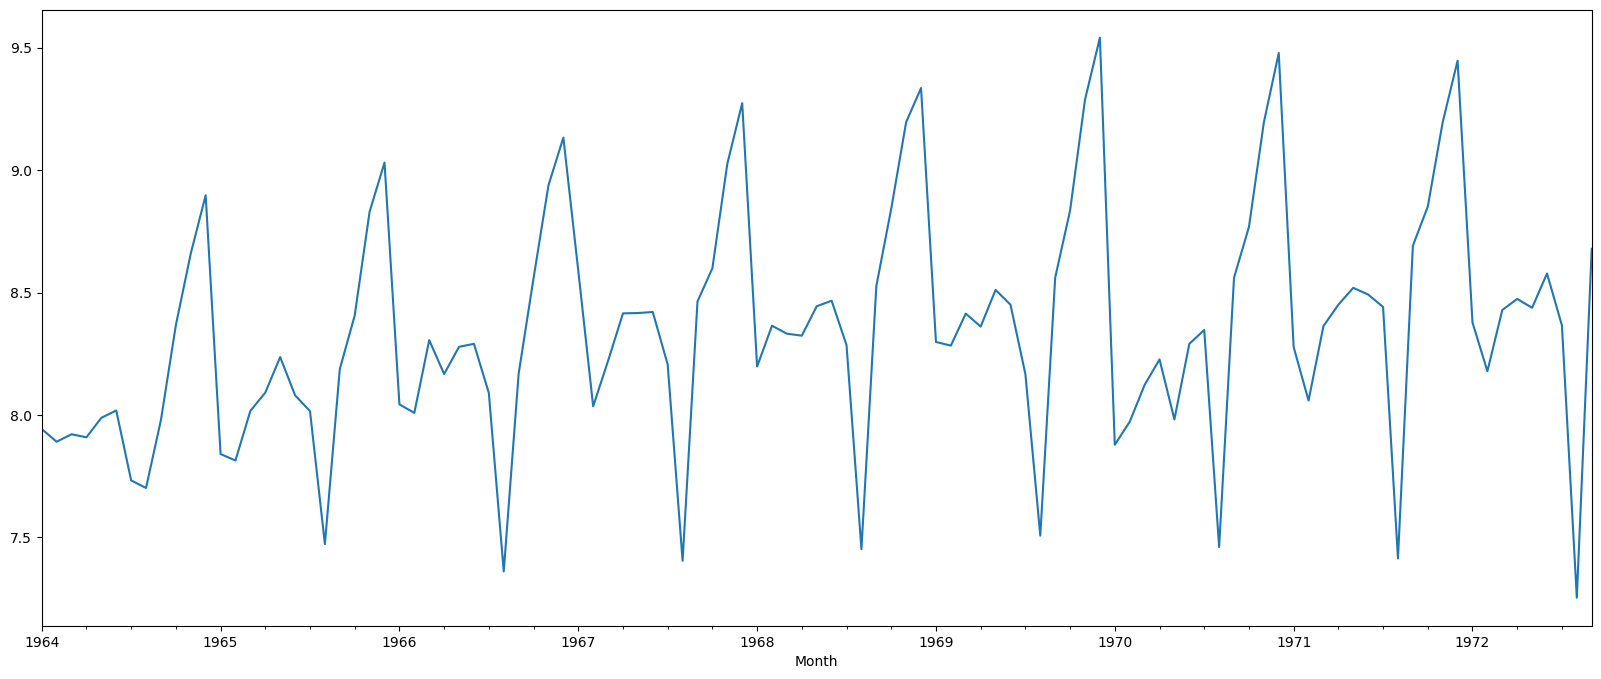

In [23]:
df = pd.read_csv("../Data/perrin-freres-monthly-champagne.csv",
                 index_col = 'Month',
                 skipfooter = 2,
                 parse_dates = True)

# Rename columns
df.rename(columns = {df.columns[0]: "Sales"}, inplace = True)

# get log sales

df['LogSales'] = np.log(df['Sales'])

# Set Frequency
df.index.freq = 'MS'

df['LogSales'].plot(figsize = (20,8))

In [24]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [32]:
model = pm.auto_arima(train['LogSales'],
                     trace = True,
                     suppress_warnings = True,
                     seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.335, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=0.37 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.20 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.14 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.35 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.18 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.03 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

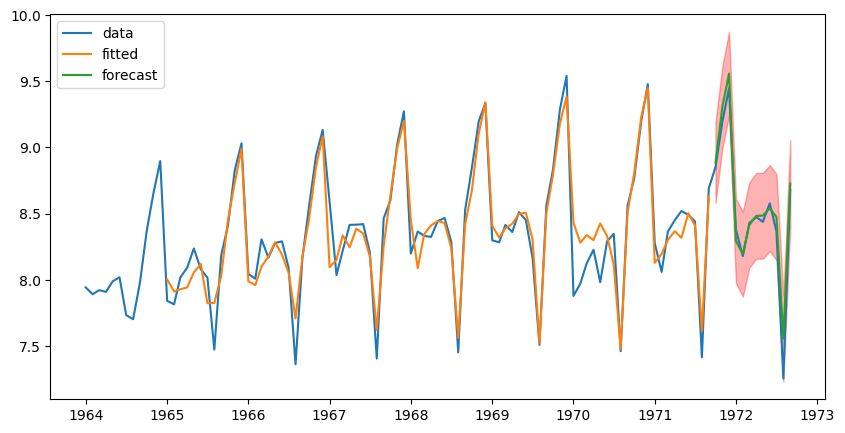

In [34]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1] # get differencing order
    
    train_pred = model.predict_in_sample(start = 12, end = -1)
    test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(fulldata.index, fulldata, label = 'data')
    ax.plot(train.index[12:], train_pred, label = 'fitted')
    ax.plot(test.index, test_pred , label = 'forecast')
    ax.fill_between(test.index, \
                   confint[:,0], confint[:,1], \
                   color = 'red', alpha = 0.3)
    ax.legend();

    
plot_result(model, df['LogSales'], train, test)